In [17]:
#READING THE CSV FILE
from matplotlib import pyplot as plt
import numpy as np
import csv
import math
plt.rcParams['figure.figsize'] = [25, 8]


with open('daily-minimum-temperatures.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    temperature_set = []
    date_set = []
    for i, row in enumerate(csv_reader):        
        date = row[0]
        temp = row[1]
        if(i != 0):
            date_set.append(date)
            temperature_set.append(float(temp))

In [2]:
def split(a, n):
    k, m = divmod(len(a), n)
    return (a[i * k + min(i, m):(i + 1) * k + min(i + 1, m)] for i in range(n))

In [3]:
#ALGORITHM TO OBTAIN THE AVG SQUARED ERROR AS F(K)
K = range(1,30) #np.r_[1:30:1]
k_fold = 10
RMSE_set = []


temperature_test_set = []
temperature_training_set = []

splitted_temperature_training_set = list(split(temperature_training_set, k_fold))

for idx, date in enumerate(date_set):
    if date[0:4] == '1990': #Warning: it works! And doing 0:3 doesnt
        temperature_test_set.append(float(temperature_set[idx]))
    else:
        temperature_training_set.append(float(temperature_set[idx]))
        
        


In [4]:
partial_RMSE_validation = []        

for k_idx in K:
    
    training_input = []
    training_output = []
        
    validation_input = []
    validation_output = []

    test_input = []
    test_output = []    
    
    for idx in range(0,len(temperature_training_set) - k_idx-1):
            training_input.append(temperature_training_set[idx:idx+k_idx])
            training_output.append(temperature_training_set[idx+k_idx+1])        
    training_input = np.c_[np.ones(len(training_output)), np.matrix(training_input)]

    for idx in range(0,len(temperature_test_set) - k_idx-1):
            test_input.append(temperature_test_set[idx:idx+k_idx])
            test_output.append(temperature_training_set[idx+k_idx+1])        
    test_input = np.c_[np.ones(len(test_output)), np.matrix(test_input)]
    
    splitted_training_input  = list(split(training_input, k_fold))
    splitted_training_output = list(split(training_output, k_fold))
    
    SE = 0 #Squared Error
    
    for k_fold_idx in range(k_fold):        
        current_training_input_set = []
        current_validation_input_set = []

        current_training_output_set = []
        current_validation_output_set = []

        for k_fold_val_turn in range(k_fold):
            if (k_fold_val_turn != k_fold_idx):
                current_training_input_set.append(splitted_training_input[k_fold_val_turn])
                current_training_output_set.append(np.array(splitted_training_output[k_fold_val_turn]))
            else:
                current_validation_input_set.append(splitted_training_input[k_fold_val_turn])
                current_validation_output_set.append(splitted_training_output[k_fold_val_turn])
        current_training_input_set = np.vstack(current_training_input_set)
        current_training_output_set = np.concatenate(current_training_output_set)
        current_validation_input_set = np.vstack(current_validation_input_set)
        current_validation_output_set = np.concatenate(current_validation_output_set)
            
        W = np.matmul(np.matmul(np.linalg.inv(np.matmul(np.matrix.transpose(current_training_input_set), current_training_input_set)), np.matrix.transpose(current_training_input_set)), current_training_output_set)
        for test_idx , test_element in enumerate(current_validation_input_set):
            SE = SE + (np.matmul(W, np.matrix.transpose(test_element)) - current_validation_output_set[test_idx])**2/(len(current_validation_output_set)*k_fold)    
    RMSE_set.append(math.sqrt(SE))

In [5]:
k_min = K[np.squeeze(np.where(RMSE_set == np.amin(RMSE_set)))]
print("O Valor de amostras passadas onde se identifica o menor erro é dada por K = ",k_min)

O Valor de amostras passadas onde se identifica o menor erro é dada por K =  25


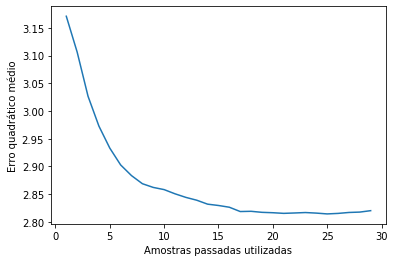

In [6]:
plt.plot(K, RMSE_set)
plt.xlabel('Amostras passadas utilizadas')
plt.ylabel('Erro quadrático médio')
plt.show()

In [19]:
#ALGORITHM TO OBTAIN THE AVG SQUARED ERROR AS F(K)
dly = 25 #np.r_[1:30:1]

temperature_test_set = []
temperature_training_set = []

for idx, date in enumerate(date_set):
    if date[0:4] == '1990': #Warning: it works! And doing 0:3 doesnt
        temperature_test_set.append(float(temperature_set[idx]))
    else:
        temperature_training_set.append(float(temperature_set[idx]))     
    
training_input = []
training_output = []

test_input = []
test_output = []    

for idx in range(0,len(temperature_training_set) - dly-1):
        training_input.append(temperature_training_set[idx:idx+dly])
        training_output.append(temperature_training_set[idx+dly+1])        
training_input = np.c_[np.ones(len(training_output)), np.matrix(training_input)]

for idx in range(0,len(temperature_test_set) - dly-1):
        test_input.append(temperature_test_set[idx:idx+dly])
        test_output.append(temperature_training_set[idx+dly+1])        
test_input = np.c_[np.ones(len(test_output)), np.matrix(test_input)]
        
W = np.matmul(np.matmul(np.linalg.inv(np.matmul(np.matrix.transpose(training_input), training_input)), np.matrix.transpose(training_input)), training_output)
predicted_result_set = []
SE = 0
for test_idx , test_element in enumerate(test_input):
    predicted_result_set.append(np.matmul(W, np.matrix.transpose(test_element)))
    SE = SE + (np.squeeze(np.matmul(W, np.matrix.transpose(test_element))) - test_output[test_idx])**2/(len(test_output))
predicted_result_set = np.squeeze(predicted_result_set)

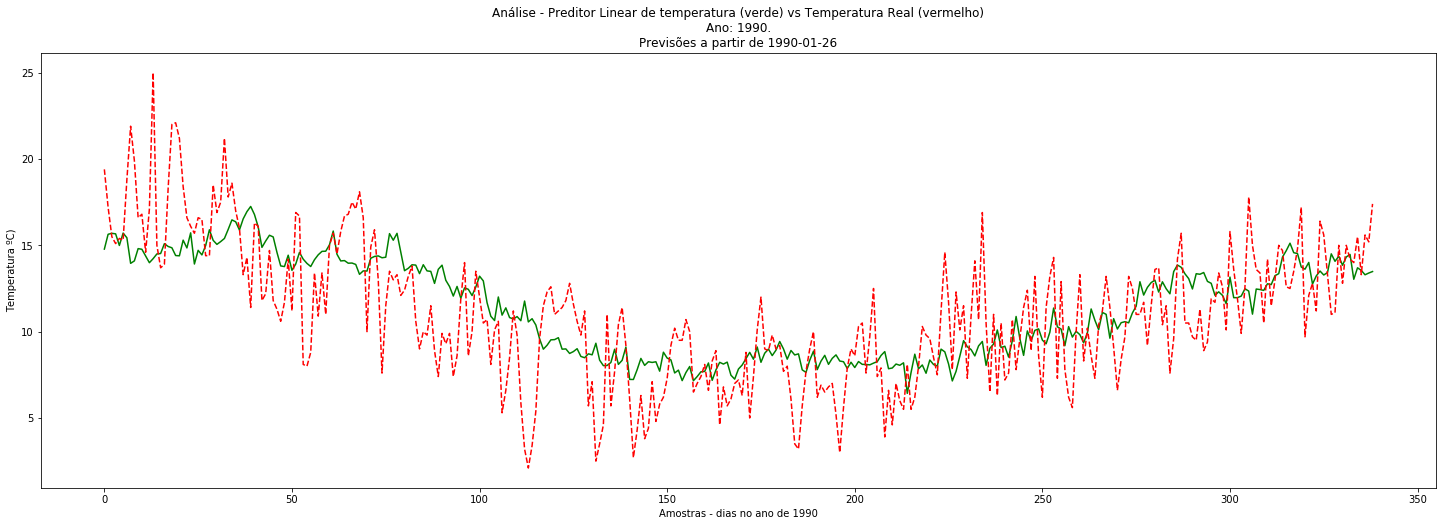

In [18]:
plt.plot(np.array(range(len(predicted_result_set))), predicted_result_set, 'g')
plt.plot(np.array(range(len(predicted_result_set))), test_output, 'r--')
plt.xlabel('Amostras - dias no ano de 1990')
plt.ylabel('Temperatura ºC)')
plt.title('Análise - Preditor Linear de temperatura (verde) vs Temperatura Real (vermelho)\nAno: 1990.\nPrevisões a partir de ' + date_set[3285 + dly])
plt.show()


In [20]:
SE

matrix([[8.41793903]])

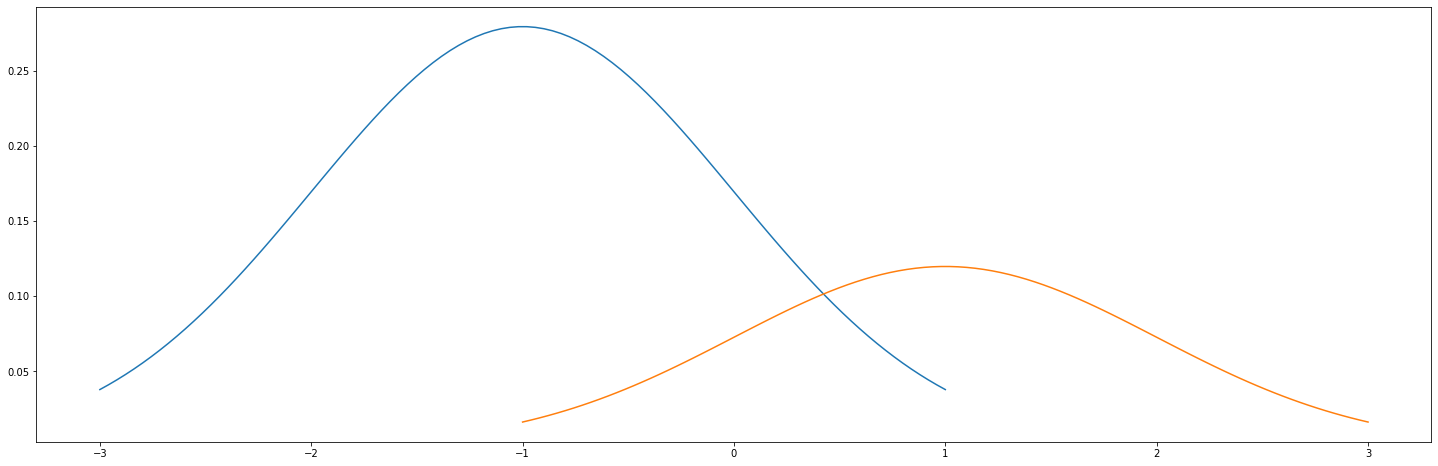

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

mu = -1
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 2*sigma, mu + 2*sigma, 100)
y1 = 0.7*stats.norm.pdf(x, mu, sigma)
plt.plot(x, 0.7*stats.norm.pdf(x, mu, sigma))

mu = 1
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 2*sigma, mu + 2*sigma, 100)
y2 = 0.3*stats.norm.pdf(x, mu, sigma)
plt.plot(x, 0.3*stats.norm.pdf(x, mu, sigma))



plt.show()

In [31]:
y1>y2

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [30]:
y2[30]

0.08774785777757889

In [33]:
x = np.linspace(mu - 2*sigma, mu + 2*sigma, 100)

In [35]:
mu = -1
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 2*sigma, mu + 2*sigma, 100)

In [36]:
x

array([-3.        , -2.95959596, -2.91919192, -2.87878788, -2.83838384,
       -2.7979798 , -2.75757576, -2.71717172, -2.67676768, -2.63636364,
       -2.5959596 , -2.55555556, -2.51515152, -2.47474747, -2.43434343,
       -2.39393939, -2.35353535, -2.31313131, -2.27272727, -2.23232323,
       -2.19191919, -2.15151515, -2.11111111, -2.07070707, -2.03030303,
       -1.98989899, -1.94949495, -1.90909091, -1.86868687, -1.82828283,
       -1.78787879, -1.74747475, -1.70707071, -1.66666667, -1.62626263,
       -1.58585859, -1.54545455, -1.50505051, -1.46464646, -1.42424242,
       -1.38383838, -1.34343434, -1.3030303 , -1.26262626, -1.22222222,
       -1.18181818, -1.14141414, -1.1010101 , -1.06060606, -1.02020202,
       -0.97979798, -0.93939394, -0.8989899 , -0.85858586, -0.81818182,
       -0.77777778, -0.73737374, -0.6969697 , -0.65656566, -0.61616162,
       -0.57575758, -0.53535354, -0.49494949, -0.45454545, -0.41414141,
       -0.37373737, -0.33333333, -0.29292929, -0.25252525, -0.21

In [38]:
x = range(-3,3, 0.1)

TypeError: 'float' object cannot be interpreted as an integer